In [ ]:
%pip install matplotlib

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [ ]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

<matplotlib.collections.PathCollection at 0x289533da2d0>

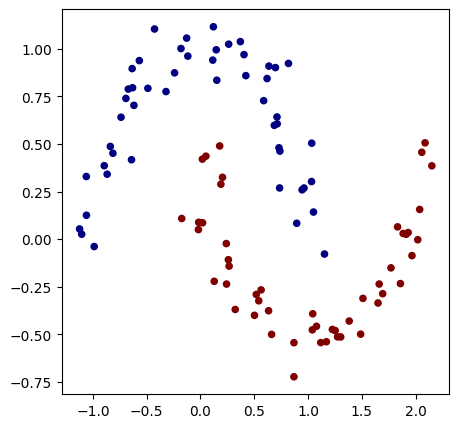

In [ ]:
# initialize a model
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]

number of parameters 337

In [ ]:
# loss function
def loss(batch_size=None):

    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.2597864578518354, grad=0) 0.22


In [ ]:
# optimization
for k in range(40):

    # forward
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()

    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.2597864578518354, accuracy 22.0%

step 1 loss 0.9167184048737905, accuracy 78.0%

step 2 loss 0.4044431452602258, accuracy 84.0%

step 3 loss 0.3281539225539719, accuracy 84.0%

step 4 loss 0.2639611254414194, accuracy 89.0%

step 5 loss 0.22465989987403057, accuracy 90.0%

step 6 loss 0.2079431982923737, accuracy 90.0%

step 7 loss 0.2762441925068156, accuracy 93.0%

step 8 loss 0.5322950967620954, accuracy 85.0%

step 9 loss 0.4648369742412454, accuracy 86.0%

step 10 loss 0.2594113158418334, accuracy 87.0%

step 11 loss 0.20977551691969243, accuracy 90.0%

step 12 loss 0.18030152394327753, accuracy 90.0%

step 13 loss 0.17059538675966257, accuracy 92.0%

step 14 loss 0.18317733088334415, accuracy 92.0%

step 15 loss 0.16916873794718199, accuracy 92.0%

step 16 loss 0.15616702018801124, accuracy 92.0%

step 17 loss 0.1577124889436171, accuracy 92.0%

step 18 loss 0.18595204063623724, accuracy 93.0%

step 19 loss 0.15330629755789585, accuracy 93.0%

step 20 loss 0.1458131974564559, accuracy 93.0%

step 21 loss 0.14352229251445794, accuracy 96.0%

step 22 loss 0.17849047577385863, accuracy 92.0%

step 23 loss 0.13690998755027908, accuracy 96.0%

step 24 loss 0.12603020519301103, accuracy 93.0%

step 25 loss 0.12166924187568352, accuracy 98.0%

step 26 loss 0.1368453262353939, accuracy 93.0%

step 27 loss 0.13413330931102607, accuracy 98.0%

step 28 loss 0.12611940455613943, accuracy 93.0%

step 29 loss 0.09762801478018103, accuracy 99.0%

step 30 loss 0.10993084014359764, accuracy 96.0%

step 31 loss 0.11900490484370807, accuracy 98.0%

step 32 loss 0.13427571280156206, accuracy 93.0%

step 33 loss 0.09012939078749359, accuracy 98.0%

step 34 loss 0.08316604280071317, accuracy 98.0%

step 35 loss 0.08964519624231179, accuracy 98.0%

step 36 loss 0.08230484872547225, accuracy 99.0%

step 37 loss 0.09126138799539561, accuracy 97.0%

step 38 loss 0.07192721745346514, accuracy 99.0%

step 39 loss 0.07134703488743915, accuracy 99.0%

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.7222875713140986, 2.027712428685901)


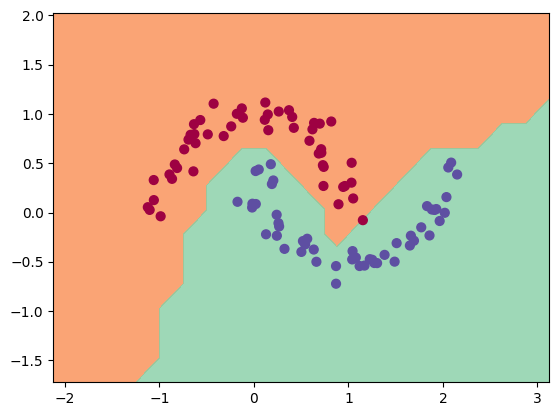